In [50]:
# -*- coding: utf-8 -*-
# <nbformat>3.0</nbformat>

# <codecell>

# coding: utf-8
%matplotlib inline
import matplotlib
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
from matplotlib import rc ## desnec?essário
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 22})


'''
Method of lines - Intraguild Predation + Diffusion
Quimiostatic growth for resource
Already using adimensionlization
'''

#Parametros

d_1 = 5
d_2 = 5
d_r = 5
m = 1.5
mu = 20
gamma = 0.1
alpha = 0.5
beta = 5 #Bifurcações ao aumentar o beta!
phi = 1.0

#Discretização
M = 101 #espaço
N = 4000 #tempo
Tmax = 400.0

In [2]:
# -------------------- Funcional Response - IGP

'''
f_R(R,C1,C2) = mu - phi*R - C1*R - C2*R 

f_C1(R,C1,C2) = C1*R - C1 - alpha*C1*C2 

f_C2(R,C1,C2) = m*gamma*C2*R - m*C2 + beta*alpha*C1*C2
'''

def f_R(R, C1, C2):
    return mu - phi*R - C1*R - C2*R 

def f_C1(R, C1, C2):
    return C1*R - C1 - alpha*C1*C2 

def f_C2(R, C1, C2):
    return m*gamma*C2*R - m*C2 + beta*alpha*C1*C2

In [3]:
#inicialize as populações
def init(M):
    
    #Populações iniciais - sino
    x = np.linspace(0,np.pi,M)
    
    R0 = 1.0*np.sin(x)
    C10 = 1.0*np.sin(x)
    C20 = 1.0*np.sin(x)
    
    del x
    
    '''
    #Populações iniciais - step function
    
    R0 = np.zeros(M)
    C10 = np.zeros(M)
    C20 = np.zeros(M)
    
    R_0 = 1.0
    C1_0 = 1.0
    C2_0 = 1.0
    for i in range(0,M):
        if i >= 0.3*M and i < 0.7*M:
            R0[i] = R_0
            C10[i] = C1_0
            C20[i] = C2_0
            
    '''
    
    return R0,C10,C20

In [4]:
def ddt(y,t):
    
    #discret
    h = np.pi/(M-1)
    
    #c.contorno (Dirichlet)
    if d_r > 0:
        
        dRdt = np.zeros(M)
        dC1dt = np.zeros(M)
        dC2dt = np.zeros(M)

        R = y[0:M]
        C1 = y[M:2*M]
        C2 = y[2*M:]

        R[0] = 0
        C1[0] = 0
        C2[0] = 0
        R[-1] = 0
        C1[-1] = 0
        C2[-1] = 0

        dRdt[1:M-1] = d_r*(R[2:M] - 2*R[1:M-1] + R[0:M-2])/(h**2) + f_R(R[1:M-1],C1[1:M-1],C2[1:M-1])
        dC1dt[1:M-1] = d_1*(C1[2:M] - 2*C1[1:M-1] + C1[0:M-2])/(h**2) + f_C1(R[1:M-1],C1[1:M-1],C2[1:M-1])
        dC2dt[1:M-1] = d_2*(C2[2:M] - 2*C2[1:M-1] + C2[0:M-2])/(h**2) + f_C2(R[1:M-1],C1[1:M-1],C2[1:M-1])
        
    #c. contorno: Dirichlet, mas com d_r = 0 (portanto, não sofre CC)
    elif d_r == 0:
        
        dRdt = np.zeros(M)
        dC1dt = np.zeros(M)
        dC2dt = np.zeros(M)

        R = y[0:M]
        C1 = y[M:2*(M)]
        C2 = y[2*(M):]

        C1[0] = 0
        C2[0] = 0

        C1[-1] = 0
        C2[-1] = 0

        dRdt[0:M] = f_R(R[0:M],C1[0:M],C2[0:M])
        dC1dt[1:M-1] = d_1*(C1[2:M] - 2*C1[1:M-1] + C1[0:M-2])/(h**2) + f_C1(R[1:M-1],C1[1:M-1],C2[1:M-1])
        dC2dt[1:M-1] = d_2*(C2[2:M] - 2*C2[1:M-1] + C2[0:M-2])/(h**2) + f_C2(R[1:M-1],C1[1:M-1],C2[1:M-1])
    
    '''
    #c. contorno (Neumann) - Lembre de mudar M para M+2!
    
    dRdt = np.zeros(M+2)
    dC1dt = np.zeros(M+2)
    dC2dt = np.zeros(M+2)
    
    R = y[0:M+2]
    C1 = y[M+2:2*(M+2)]
    C2 = y[2*(M+2):]
    
    R[0] = R[1]
    C1[0] = C1[1]
    C2[0] = C2[1]
    R[-1] = R[-2]
    C1[-1] = C1[-2]
    C2[-1] = C2[-2]
    
    for m in range(1,M+1):
        
        dRdt[m] = d_r*(R[m+1] - 2*R[m] + R[m-1])/(h**2) #+ f_R(R[1:M-1],C1[1:M-1],C2[1:M-1])
        dC1dt[m] = d_1*(C1[m+1] - 2*C1[m] + C1[m-1])/(h**2) #+ f_C1(R[1:M-1],C1[1:M-1],C2[1:M-1])
        dC2dt[m] = d_2*(C2[m+1] - 2*C2[m] + C2[m-1])/(h**2) #+ f_C2(R[1:M-1],C1[1:M-1],C2[1:M-1])
    '''
    '''
       
    #c. contorno: (Neumann para R e Dirichlet p/ Cs) - Lembre de mudar o grid de M para M+2!
    
    dRdt = np.zeros(M+2) #Os ddts nunca são calculados nas extremidades? Posso deixar como zero?
    dC1dt = np.zeros(M+2)
    dC2dt = np.zeros(M+2)
    
    R = y[0:M+2]
    C1 = y[M+2:2*(M+2)]
    C2 = y[2*(M+2):]
    
    R[0] = R[1]
    C1[1] = 0
    C2[1] = 0
    
    R[-1] = R[-2]
    C1[-2] = 0
    C2[-2] = 0
            
    dRdt[1:M+1] = d_r*(R[2:M+2] - 2*R[1:M+1] + R[0:M])/(h**2) + f_R(R[1:M+1],C1[1:M+1],C2[1:M+1])    
        
    dC1dt[2:M] = d_1*(C1[3:M+1] - 2*C1[2:M] + C1[1:M-1])/(h**2) + f_C1(R[2:M],C1[2:M],C2[2:M])
    dC2dt[2:M] = d_2*(C2[3:M+1] - 2*C2[2:M] + C2[1:M-1])/(h**2) + f_C2(R[2:M],C1[2:M],C2[2:M])
    '''

    return np.r_[dRdt,dC1dt,dC2dt]

In [5]:
#Funções que calculam os mu_i, deduzidos pelo MÉTODO VARIACIONAL, R, C1, C2 em Dirichlet
def mu_1():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return 3*(np.pi**2)*(phi+d_r)*(1+d_1)/32
    
    elif d_r == 0:
        return phi*(1+d_1)

def mu_2():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return (3*np.pi**2)*(m + d_2 - m*gamma*(1+d_1))*(1+d_1)/(32*beta*alpha) + (3*np.pi**2)*(phi+d_r)*(1+d_1)/32
        #return (3*np.pi**2)*(1 + d_1)*(d_2 + m + beta*alpha*(phi + d_r) - m*gamma*(1+d_1))/(32*beta*alpha)

def mu_3():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return (3*np.pi**2)*(m + d_2)*((m+d_2)/(m*gamma) - 1 - d_1)/(32*m*gamma*alpha) + (3*np.pi**2)*(m + d_2)*(phi+d_r)/(32*m*gamma)

def mu_4():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return 3*(np.pi**2)*(phi+d_r)*(m+d_2)/(32*m*gamma)
    
    elif d_r == 0:
        return phi*(m+d_2)/(m*gamma)

In [6]:
#Calcula a estimativa do "L Crítico" (?) a partir do método variacional
#Obs: Na verdade, é o L' = L*sqrt(m_1)/pi
def Lc():
    return np.sqrt((D2/m - D1*gamma)*1/(gamma - 1))
    

In [113]:
#Integre um caso aqui
DR = 1.0
D1 = 1.0
D2 = 5.0
l = 1.0
d_r = DR/l**2
d_1 = D1/l**2
d_2 = D2/l**2
mu = 15
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 8
phi = 1.0
#pop inicial
R0,C10,C20 = init(M)
y0 = np.r_[R0,C10,C20]
sol = scipy.integrate.odeint(ddt,y0,t) 
sol = np.array(sol)

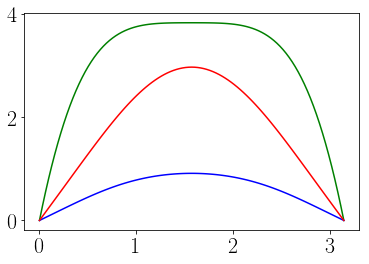

In [114]:
#plot no espaço]

#sol = np.load('Method_Of_LinesIGP_DR=%.3f,D1=%.3f,D2=%.3f,l=%.3f,mu=%.3f,gamma=%.3f,beta=%.f.npy'
            #% (l,D_r,D_1,D_2,mu,gamma,beta))

R = np.transpose(sol[:,0:M])
C1 = np.transpose(sol[:,M:2*(M)])
C2 = np.transpose(sol[:,2*(M):])
x = np.linspace(0,np.pi,M)
plt.plot(x,R[0:M,-10],color = 'green')
plt.plot(x,C1[0:M,-10], color = 'blue')
plt.plot(x,C2[0:M,-10],color = 'red')
#plt.axis([0,np.pi,0,10])

In [122]:
#centro do patch no tempo (ver se a população está constante mesmo,por exemplo)
DR = 1.0
D1 = 1.0
D2 = 5.0
l = 1.0
alpha = 1.0
beta = 8
gamma = 0.5
phi = 1.0
mu = 15

sol = np.load('Method_Of_LinesIGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
        % (l,DR,D1,D2,mu,gamma,beta))

R = np.transpose(sol[:,0:M])
C1 = np.transpose(sol[:,M:2*M])
C2 = np.transpose(sol[:,2*M:])
plt.plot(t[-100:],R[M/2,-100:],color = 'green')
plt.plot(t[-100:],C1[M/2,-100:],color = 'blue')
plt.plot(t[-100:],C2[M/2,-100:],color = 'red')

IOError: [Errno 2] No such file or directory: 'Method_Of_LinesIGP_l = 1.000,DR=1.000,D1=1.000,D2=5.000,mu=15.000,gamma=0.500,beta =8.000.npy'

In [41]:
#Faça para vários dR, d1, d2, mu
DR = [0]
D1 = [5]
D2 = [5]
MU = [0.0 + i for i in range(0,140)]
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 1
phi = 1.0
#pop inicial
R0,C10,C20 = init(M)
y0 = np.r_[R0,C10,C20]
for d_r in DR:
    print("d_r = " + str(d_r))
    for d_1 in D1:
        print("d_1 = " + str(d_1))
        for d_2 in D2:
            print("d_2 = " + str(d_2))
            for mu in MU:
                print("mu = " + str(mu))
                sol = scipy.integrate.odeint(ddt,y0,t)
                sol = np.array(sol)
                np.save('Method_Of_LinesIGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f,phi=%.3f,m=%.3f'
                        % (d_r,d_1,d_2,mu,alpha,gamma,beta,phi,m),sol)

d_r = 0
d_1 = 5
d_2 = 5
mu = 0.0
mu = 1.0
mu = 2.0
mu = 3.0
mu = 4.0
mu = 5.0
mu = 6.0
mu = 7.0
mu = 8.0
mu = 9.0
mu = 10.0
mu = 11.0
mu = 12.0
mu = 13.0
mu = 14.0
mu = 15.0
mu = 16.0
mu = 17.0
mu = 18.0
mu = 19.0
mu = 20.0
mu = 21.0
mu = 22.0
mu = 23.0
mu = 24.0
mu = 25.0
mu = 26.0
mu = 27.0
mu = 28.0
mu = 29.0
mu = 30.0
mu = 31.0
mu = 32.0
mu = 33.0
mu = 34.0
mu = 35.0
mu = 36.0
mu = 37.0
mu = 38.0
mu = 39.0
mu = 40.0
mu = 41.0
mu = 42.0
mu = 43.0
mu = 44.0
mu = 45.0
mu = 46.0
mu = 47.0
mu = 48.0
mu = 49.0
mu = 50.0
mu = 51.0
mu = 52.0
mu = 53.0
mu = 54.0
mu = 55.0
mu = 56.0
mu = 57.0
mu = 58.0
mu = 59.0
mu = 60.0
mu = 61.0
mu = 62.0
mu = 63.0
mu = 64.0
mu = 65.0
mu = 66.0
mu = 67.0
mu = 68.0
mu = 69.0
mu = 70.0
mu = 71.0
mu = 72.0
mu = 73.0
mu = 74.0
mu = 75.0
mu = 76.0
mu = 77.0
mu = 78.0
mu = 79.0
mu = 80.0
mu = 81.0
mu = 82.0
mu = 83.0
mu = 84.0
mu = 85.0
mu = 86.0
mu = 87.0
mu = 88.0
mu = 89.0
mu = 90.0
mu = 91.0
mu = 92.0
mu = 93.0
mu = 94.0
mu = 95.0
mu = 96.0
mu = 97.0
mu = 9

(None, None, None)


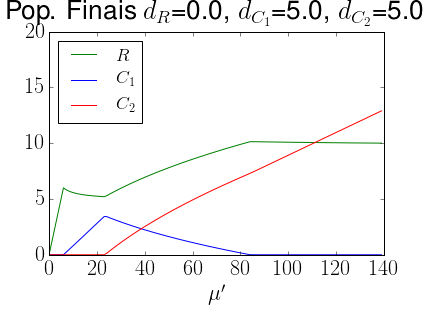

In [43]:
#Imprima a população final
DR = [0]
D1 = [5]
D2 = [5]
MU = [0.0 + i for i in range(0,140)]
m = 1.0
gamma = 0.5
alpha = 1
beta = 1
phi = 1.0

Rfinal = []
C1final = []
C2final = []
t = np.linspace(0,Tmax,N)
for d_r in DR:
    for d_1 in D1:
        for d_2 in D2:
            for mu in MU:
                sol = np.load('Method_Of_LinesIGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f,phi=%.3f,m=%.3f.npy'
                              % (d_r,d_1,d_2,mu,alpha,gamma,beta,phi,m))
                R = np.transpose(sol[:,0:M])
                C1 = np.transpose(sol[:,M:2*M])
                C2 = np.transpose(sol[:,2*M:])
                Rfinal.append(R[M/2,-1])
                C1final.append(C1[M/2,-1])
                C2final.append(C2[M/2,-1])

plt.plot(MU,Rfinal,color = 'green', label = r'$R$')
plt.plot(MU,C1final,color = 'blue', label = r'$C_1$')
plt.plot(MU,C2final,color = 'red', label = r'$C_2$')
plt.xlabel(r"$\mu'$")
plt.legend(loc = 'upper left', prop={'size': 18})
plt.title(r'Pop. Finais $d_R$=%.1f, $d_{C_1}$=%.1f, $d_{C_2}$=%.1f' % (d_r,d_1,d_2))
plt.axis([0,140,0,20])
#plt.axvline(x=mu_1(), color='black', linestyle='--')
#plt.axvline(x=mu_2(), color='black', linestyle='--')
#plt.axvline(x=mu_3(), color='black', linestyle='--')
#print (mu_1(),mu_2(),mu_3())
#plt.savefig('Method_Of_LinesIGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f,phi=%.3f,m=%.3f.png'
                              #% (d_r,d_1,d_2,mu,alpha,gamma,beta,phi,m))

# R = np.transpose(sol[:,0:M]) np.shape(R)

In [ ]:
#Gera os dados para fazer o gráfico L x mu
#L' = sqrt(m1)*(L/pi)
Nl = 50 #Número de pontos de L (0.8 ~ 2 para esses param)
Nmu = 50 #Número de pontos de MU (0 ~ 25 para esses param)
L = [1.5 + 0.024*j for j in range(0,Nl)]
MU = [0.0 + 0.25*i for i in range(0,Nmu)]
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 1.5
alpha = 1
beta = 1
phi = 1.0

#pop inicial
R0,C10,C20 = init(M)
y0 = np.r_[R0,C10,C20]

D = [[7.0,3.0,0.0],[5.0,5.0,1.0],[5.0,5.0,0.0]]
for d in D:
    print("D = " + str(d))
    D1,D2,DR = d[0],d[1],d[2]
    for l in L:
        d_1 = D1/(l**2) #O Numerador é o D do modelo antes de adimensionalizar!
        d_2 = D2/(l**2)
        d_r = DR/(l**2)
        for mu in MU:
            sol = scipy.integrate.odeint(ddt,y0,t)
            sol = np.array(sol)
            np.save('Method_Of_LinesIGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f'
                    % (l,DR,D1,D2,mu,gamma),sol)

In [22]:
#faz o gráfico L x mu
#Parte 1) Leia os dados, pegue as populações do Centro do Patch no instante final
Nl = 50 #Número de pontos de L (0.8 ~ 2 se gamma = 0.5, 1.5 ~ 2.7 se gamma = 1.5)
Nmu = 50 #Número de pontos de MU (0 ~ 25 se gamma = 0.5, 0 ~ 12.5 se gamma = 1.5)
L = [1.5 + 0.024*j for j in range(0,Nl)]
MU = [0.0 + 0.25*i for i in range(0,Nmu)]
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 1.5
alpha = 1
beta = 1
phi = 1.0
Rfinal = np.zeros((Nl,Nmu))
C1final = np.zeros((Nl,Nmu))
C2final = np.zeros((Nl,Nmu))

#escolha os Ds
D1 = 7.0
D2 = 3.0
DR = 1.0

for i in range (0,Nl):
    print("l = " + str(L[i]))
    for j in range(0,Nmu):
        sol = np.load('Method_Of_LinesIGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f.npy'
                              % (L[i],DR,D1,D2,MU[j],gamma))
        R = np.transpose(sol[:,0:M])
        C1 = np.transpose(sol[:,M:2*M])
        C2 = np.transpose(sol[:,2*M:])
        Rfinal[i,j] = R[M/2,-1]
        C1final[i,j] = C1[M/2,-1]
        C2final[i,j] = C2[M/2,-1]

l = 1.5
l = 1.524
l = 1.548
l = 1.572
l = 1.596
l = 1.62
l = 1.644
l = 1.668
l = 1.692
l = 1.716
l = 1.74
l = 1.764
l = 1.788
l = 1.812
l = 1.836
l = 1.86
l = 1.884
l = 1.908
l = 1.932
l = 1.956
l = 1.98
l = 2.004
l = 2.028
l = 2.052
l = 2.076
l = 2.1
l = 2.124
l = 2.148
l = 2.172
l = 2.196
l = 2.22
l = 2.244
l = 2.268
l = 2.292
l = 2.316
l = 2.34
l = 2.364
l = 2.388
l = 2.412
l = 2.436
l = 2.46
l = 2.484
l = 2.508
l = 2.532
l = 2.556
l = 2.58
l = 2.604
l = 2.628
l = 2.652
l = 2.676


(nan, None, None, None, None)


-c:4: RuntimeWarning: invalid value encountered in sqrt


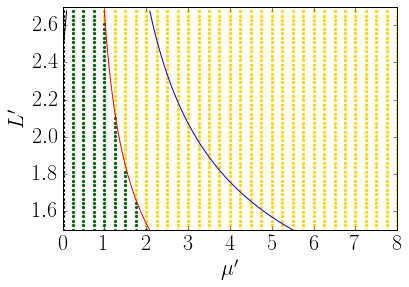

In [23]:
#faz o gráfico L x mu
#Parte 2) Verifique onde as populações sobrevivem e plote!
#USAR FILL_BETWEEN DEPOIS?
epsilon = 10E-8
MU1 = np.zeros(Nl)
MU2 = np.zeros(Nl)
MU3 = np.zeros(Nl)
MU4 = np.zeros(Nl)
for i in range (0,Nl):
    d_1 = D1/(L[i]**2)
    d_2 = D2/(L[i]**2)
    d_r = DR/(L[i]**2)
    
    #mus determinado pelo método variacional
    MU1[i] = mu_1()
    MU2[i] = mu_2()
    MU3[i] = mu_3()
    MU4[i] = mu_4()

    for j in range(0,Nmu):
        if Rfinal[i,j] > epsilon:
            if C1final[i,j] > epsilon:
                if C2final[i,j] > epsilon:
                    plt.scatter(MU[j],L[i],marker = '.',color = 'purple') #coexistência
                else:
                    plt.scatter(MU[j],L[i],marker = '.',color = 'deepskyblue') #R, C1
            elif C2final[i,j] > epsilon:
                plt.scatter(MU[j],L[i],marker = '.',color = 'gold') #R,C2
            else:
                plt.scatter(MU[j],L[i],marker = '.',color = 'darkgreen') #R
        else:
            plt.scatter(MU[j],L[i],marker = '.',color = 'black') #No one
    '''
    #Escala de cinza
    for j in range(0,Nmu):
        if Rfinal[i,j] > epsilon:
            if C1final[i,j] > epsilon:
                if C2final[i,j] > epsilon:
                    plt.scatter(MU[j],L[i],marker = '.',color = (0.25,0.25,0.25)) #coexistência
                else:
                    plt.scatter(MU[j],L[i],marker = '.',color = (0.5,0.5,0.5)) #R, C1
            elif C2final[i,j] > epsilon:
                plt.scatter(MU[j],L[i],marker = '.',color = (0.0,0.0,0.0)) #R,C2
            else:
                plt.scatter(MU[j],L[i],marker = '.',color = (0.75,0.75,0.75)) #R
        else:
            plt.scatter(MU[j],L[i],marker = '.',color = (1.0,1.0,1.0)) #No one
    '''
'''
#Mus determinados pelo método variacional
MU1 = np.zeros(5*Nl)
MU2 = np.zeros(5*Nl)
MU3 = np.zeros(5*Nl)
MU4 = np.zeros(5*Nl)
L = [0.5 + 0.01*j for j in range(0,5*Nl)]
for i in range (0,5*Nl):
    d_1 = 3/(L[i]**2)
    d_2 = 7/(L[i]**2)
    d_r = 0/(L[i]**2)
    MU1[i] = mu_1()
    MU2[i] = mu_2()
    MU3[i] = mu_3()
    MU4[i] = mu_4()
'''
#Mu_i's
plt.plot(MU1,L,color = 'blue')
plt.plot(MU2,L,color = 'magenta')
plt.plot(MU3,L,color = 'black')
plt.plot(MU4,L,color = 'red')

#Lc
plt.axhline(y=Lc(), color='black', linestyle='--')
d_1 = D1/(Lc()**2)
d_2 = D2/(Lc()**2)
d_r = DR/(Lc()**2)
plt.axvline(x=mu_4(), color='black', linestyle='--')
print (Lc(),mu_1(),mu_2(),mu_3(),mu_4())

plt.axis([0,8,1.5,2.7]) #Lembrar: gamma = 0.5 -> L [0.8,2.0] mu [0,25]. gamma = 1.5 -> L [1.5,2.7] mu [0,12.5]
plt.xlabel(r"$\mu'$")
plt.ylabel(r"$L'$")

In [125]:
#Oscilações x L
#Gera os dados para fazer o gráfico L x mu
#L' = sqrt(m1)*(L/pi)
Nl = 50
L = [0.5 + 0.025*j for j in range(0,Nl)]
mu = 15
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 8
phi = 1.0
D = [[1.0,5.0,1.0]]
for d in D:
    print("D = " + str(d))
    D1,D2,DR = d[0],d[1],d[2]
    for l in L:
        d_1 = D1/(l**2) #O Numerador é o D do modelo antes de adimensionalizar!
        d_2 = D2/(l**2)
        d_r = DR/(l**2)
        
        R0,C10,C20 = init(M)
        y0 = np.r_[R0,C10,C20]
        
        sol = scipy.integrate.odeint(ddt,y0,t)
        sol = np.array(sol)
        np.save('Method_Of_LinesIGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f'
                % (l,DR,D1,D2,mu,gamma,beta),sol)

D = [1.0, 5.0, 1.0]


D = [1.0, 5.0, 1.0]


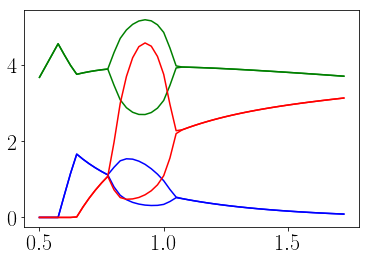

In [126]:
#Leia os dados e gere o gráfico Pop x L
Nl = 50
L = [0.5 + 0.025*j for j in range(0,Nl)]
mu = 15
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 8
phi = 1.0
D = [[1.0,5.0,1.0]]

RMAX = []
RMIN = []
C1MAX = []
C1MIN = []
C2MAX = []
C2MIN = []

for d in D:
    print("D = " + str(d))
    D1,D2,DR = d[0],d[1],d[2]
    for l in L:
        sol = np.load('Method_Of_LinesIGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
                % (l,DR,D1,D2,mu,gamma,beta))
        R = np.transpose(sol[:,0:M])
        C1 = np.transpose(sol[:,M:2*M])
        C2 = np.transpose(sol[:,2*M:])
        RMAX.append(np.max(R[M/2,-50:]))
        RMIN.append(np.min(R[M/2,-50:]))
        C1MAX.append(np.max(C1[M/2,-50:]))
        C1MIN.append(np.min(C1[M/2,-50:]))
        C2MAX.append(np.max(C2[M/2,-50:]))
        C2MIN.append(np.min(C2[M/2,-50:]))

plt.plot(L,RMAX,color = 'green')
plt.plot(L,RMIN,color = 'green')
plt.plot(L,C1MAX,color = 'blue')
plt.plot(L,C1MIN,color = 'blue')
plt.plot(L,C2MAX,color = 'red')
plt.plot(L,C2MIN,color = 'red')

In [78]:
DR = 1
l = 1.0
DR/l**2

1.0